In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [375]:
cancer = pd.read_csv('dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [376]:
import os

In [377]:
os.getcwd()

'/Users/christineromano/DSI_Course/DSI_LCR_Module/LCR/01_materials/notebooks'

In [378]:
# replace method

cancer['diagnosis'] = cancer['diagnosis'].replace({'M': 'Malignant', 'B': 'Benign'})



In [379]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [380]:
# Want to scale data but not all columns.
# Copy original data set so as not to override it.
# scale our data

standardized_cancer = cancer.copy()

# scale our data excluding id and diagnosis columns

columns_to_exclude = ['id', 'diagnosis']
columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude)

# initialize scaler

scaler = StandardScaler() # initializing our scaler
standardized_cancer[columns_to_scale] = scaler.fit_transform(standardized_cancer[columns_to_scale]) # fitting it to our data

In [381]:
standardized_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [382]:
# Never use our test data to train our models

# split data into training data and testing data.  75% training, 25% testing, for example.

# set out seed using numpy random seed function.  seed value creates "same randomness" each time.

np.random.seed(1)

# split our data

cancer_train, cancer_test = train_test_split(standardized_cancer, train_size = 0.75, shuffle = True, stratify = standardized_cancer['diagnosis']) # Do we want to shuffle data before we split it?  Boolean true or false.  

# cancer_train, cancer_test, diagnosis_train, diagnosis_test = train_test_split(standardized_cancer[['perimeter_mean', 'concavity_mean']], standardized_cancer['diagnosis'], train_size = 0.75, shuffle = True, stratify = standardized_cancer['diagnosis']) # Do we want to shuffle data before we split it?  Boolean true or false.  

# We chose true. 
# Need to stratify.  Stratify argument maintains same ratio of malignant : benign in both testing and training set.


In [383]:
cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 164 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       426 non-null    int64  
 1   diagnosis                426 non-null    object 
 2   radius_mean              426 non-null    float64
 3   texture_mean             426 non-null    float64
 4   perimeter_mean           426 non-null    float64
 5   area_mean                426 non-null    float64
 6   smoothness_mean          426 non-null    float64
 7   compactness_mean         426 non-null    float64
 8   concavity_mean           426 non-null    float64
 9   concave points_mean      426 non-null    float64
 10  symmetry_mean            426 non-null    float64
 11  fractal_dimension_mean   426 non-null    float64
 12  radius_se                426 non-null    float64
 13  texture_se               426 non-null    float64
 14  perimeter_se             426 

In [384]:
cancer_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 357 to 332
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       143 non-null    int64  
 1   diagnosis                143 non-null    object 
 2   radius_mean              143 non-null    float64
 3   texture_mean             143 non-null    float64
 4   perimeter_mean           143 non-null    float64
 5   area_mean                143 non-null    float64
 6   smoothness_mean          143 non-null    float64
 7   compactness_mean         143 non-null    float64
 8   concavity_mean           143 non-null    float64
 9   concave points_mean      143 non-null    float64
 10  symmetry_mean            143 non-null    float64
 11  fractal_dimension_mean   143 non-null    float64
 12  radius_se                143 non-null    float64
 13  texture_se               143 non-null    float64
 14  perimeter_se             143 

In [385]:
# We have scaled and split data.  Let's build model

# step 1: initialize out model and save as object knn

knn = KNeighborsClassifier(n_neighbors=5)
knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [386]:
# Step 2.  Define our X and y.

X = cancer_train[['perimeter_mean', 'concavity_mean']]
y = cancer_train['diagnosis']
# y = diagnosis_train

In [387]:
type(cancer_train)

pandas.core.frame.DataFrame

In [388]:
type(cancer_test)

pandas.core.frame.DataFrame

In [389]:
# Step 3.  Fit model to training data using fit method.

knn.fit(X,y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [390]:
# Step 4.  Predict on the test set.
# Save predictions as new columns.

cancer_test['predicted'] = knn.predict(cancer_test[['perimeter_mean', 'concavity_mean']])

In [391]:
cancer_test

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predicted
357,901028,Benign,-0.073075,-0.716655,-0.142066,-0.174028,-0.635527,-0.936601,-0.926297,-0.723241,...,-0.015832,-0.313383,-0.327294,-0.748217,-0.976252,-1.052282,-0.899073,-0.871589,-0.710199,Benign
361,901041,Benign,-0.234963,0.530653,-0.277170,-0.309407,-0.750104,-0.769638,-0.695035,-0.636573,...,0.573662,-0.426569,-0.455973,-0.805204,-0.557036,-0.724371,-0.890242,-0.426699,-0.962341,Benign
212,8810703,Malignant,3.971288,-0.190738,3.976130,5.244841,1.269571,0.895628,2.903973,2.852321,...,-1.173652,2.419765,2.845036,-0.796437,-0.653093,0.229857,0.683579,-2.026684,-1.590202,Malignant
527,91813702,Benign,-0.507616,-1.633519,-0.536668,-0.530110,-0.450497,-0.782146,-0.743497,-0.579053,...,-1.043377,-0.596944,-0.554943,-0.138898,-0.298127,-0.446594,-0.115817,0.338511,-0.444757,Benign
21,8510824,Benign,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,...,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,9010877,Benign,-0.206561,-0.544452,-0.267285,-0.291490,-1.209121,-0.897940,-0.841049,-0.881874,...,-0.647666,-0.402145,-0.381613,-0.485202,-0.551311,-0.651448,-0.681180,-0.258450,-0.450299,Benign
434,908469,Benign,0.208100,-0.546779,0.120315,0.053500,-0.506718,-0.636788,-0.694784,-0.519727,...,-0.836565,-0.147774,-0.181211,-0.463284,-0.631464,-0.720533,-0.531351,-0.607890,-0.868688,Benign
299,892399,Benign,-1.027362,0.884367,-1.034658,-0.912073,0.365770,-0.689284,-0.801626,-0.778182,...,-0.237300,-1.106878,-0.910393,-0.792053,-1.069510,-1.106350,-1.269232,-1.089989,-0.896396,Benign
488,913512,Benign,-0.695066,-0.725963,-0.678775,-0.666627,1.169940,-0.221940,-0.577646,-0.453952,...,-0.665579,-0.616305,-0.581488,0.886862,-0.677903,-0.591000,-0.250572,-0.156530,-0.205361,Benign


In [392]:
# Compare actual vs predicted

cancer_test[['id', 'diagnosis', 'predicted']]

,id,diagnosis,predicted
357,901028,Benign,Benign
361,901041,Benign,Benign
212,8810703,Malignant,Malignant
527,91813702,Benign,Benign
21,8510824,Benign,Benign
...,...,...,...
364,9010877,Benign,Benign
434,908469,Benign,Benign
299,892399,Benign,Benign
488,913512,Benign,Benign


In [393]:
# Step 5: Calculate accuracy with score method (knn default)

knn.score(cancer_test[['perimeter_mean', 'concavity_mean']], cancer_test['diagnosis'])

# knn.score(cancer_test[['perimeter_mean', 'concavity_mean']], diagnosis_test)


0.9230769230769231

In [394]:
# obtain a confusion matrix

pd.crosstab(
    cancer_test["diagnosis"],
    cancer_test["predicted"],
    rownames= ['Actual'],
    colnames=['Predicted']
)

Predicted,Benign,Malignant
Actual,,
Benign,88,2
Malignant,9,44


In [395]:
precision_score(
    y_true = cancer_test['diagnosis'], 
    y_pred = cancer_test['predicted'],
    pos_label = 'Malignant'
)

0.9565217391304348

In [396]:
recall_score(
    y_true=cancer_test["diagnosis"],
    y_pred=cancer_test["predicted"],
    pos_label="Malignant"
)

0.8301886792452831

precision: of all things I predicted as positive, how many were actually correct?
recall: of all the actual positives out there, how many did I catch?

In [397]:
# We're going to split our training data into sub-train and validation

#np.random.seed(1)  # Will get different accuracy value each time if we skip this step.

cancer_subtrain, cancer_validation = train_test_split(cancer_train, train_size=0.75, shuffle = True, stratify=cancer_train['diagnosis'])

In [398]:
# Step 1. Initializing our model

knn = KNeighborsClassifier(n_neighbors=4)

In [399]:
x = cancer_subtrain[["perimeter_mean", "concavity_mean"]]
y = cancer_subtrain["diagnosis"]


In [400]:
knn.fit(x, y)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [401]:
knn.score(
    cancer_validation[["perimeter_mean", "concavity_mean"]],
    cancer_validation["diagnosis"])

0.8691588785046729

In [402]:
# Cross Validation.  Each portion of data gets to be used for evaluation. 

# 1. CV = 5 (5-fold cross validation)

knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_train[['perimeter_mean', 'concavity_mean']]
y = cancer_train['diagnosis']

In [403]:
# Cross Validate Function

returned_dictionary = cross_validate(
   estimator = knn ,
   cv = 5,
   X = X,
   y = y
)


In [404]:
returned_dictionary

{'fit_time': array([0.00136089, 0.00124097, 0.00117779, 0.00098395, 0.00101328]),
 'score_time': array([0.00436497, 0.00292683, 0.00291133, 0.00282097, 0.00289679]),
 'test_score': array([0.93023256, 0.89411765, 0.87058824, 0.95294118, 0.91764706])}

In [405]:
cv_5_df = pd.DataFrame(returned_dictionary)    # Converting it to pandas DataFrame

cv_5_df

,fit_time,score_time,test_score
0,0.001361,0.004365,0.930233
1,0.001241,0.002927,0.894118
2,0.001178,0.002911,0.870588
3,0.000984,0.002821,0.952941
4,0.001013,0.002897,0.917647


In [406]:
# Compute mean and standard error of the mean (SEM) for each column
cv_5_metrics = cv_5_df.agg(["mean", "sem"])

cv_5_metrics

,fit_time,score_time,test_score
mean,0.001155,0.003184,0.913105
sem,0.000071,0.000296,0.014264


In [407]:
print(x.shape)

(319, 2)


In [408]:
print(y.shape)

(426,)


lowercase variables are a vector, uppercase are matricies

In [409]:
"""
The `range` function in Python generates sequences of numbers. 

`range(start, stop, step)` creates a sequence from `start` to `stop-1`, incrementing by `step`. For example, `range(1, 100, 5)` produces 1, 6, 11, ..., 96.
`range(start, stop)` generates numbers from `start` to `stop-1`. For example, `range(1, 4)` produces 1, 2, 3.
`range(stop)` starts from 0 and goes up to `stop-1`. For example, `range(4)` produces 0, 1, 2, 3.
"""

parameter_grid = {
    "n_neighbors": range(1, 100, 5),
}

In [410]:
cancer_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)

In [411]:
cancer_tune_grid.fit(
    cancer_train[["perimeter_mean", "concavity_mean"]],
    cancer_train["diagnosis"]
)

,estimator,KNeighborsCla...n_neighbors=3)
,param_grid,"{'n_neighbors': range(1, 100, 5)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,16


In [412]:
accuracies_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001109,0.000204,0.002352,0.000426,1,{'n_neighbors': 1},0.953488,0.837209,0.906977,0.860465,0.813953,0.837209,0.880952,0.904762,0.880952,0.880952,0.875692,0.038684,20
1,0.001036,0.000090,0.002178,0.000198,6,{'n_neighbors': 6},0.930233,0.953488,0.906977,0.837209,0.837209,0.906977,0.928571,0.928571,0.880952,0.976190,0.908638,0.043373,18
2,0.001006,0.000063,0.002090,0.000047,11,{'n_neighbors': 11},0.906977,0.930233,0.906977,0.837209,0.837209,0.883721,0.952381,0.904762,0.928571,0.952381,0.904042,0.039147,19
3,0.001002,0.000070,0.002159,0.000221,16,{'n_neighbors': 16},0.906977,0.953488,0.930233,0.837209,0.837209,0.930233,0.952381,0.952381,0.928571,0.976190,0.920487,0.045315,1
4,0.001011,0.000070,0.002131,0.000088,21,{'n_neighbors': 21},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.952381,0.880952,0.976190,0.913400,0.046495,11
5,0.000999,0.000041,0.002194,0.000183,26,{'n_neighbors': 26},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.928571,0.904762,0.976190,0.913400,0.043989,11
6,0.000988,0.000032,0.002141,0.000065,31,{'n_neighbors': 31},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.928571,0.904762,0.976190,0.913400,0.043989,11
7,0.000989,0.000030,0.002164,0.000067,36,{'n_neighbors': 36},0.906977,0.953488,0.930233,0.837209,0.837209,0.883721,0.928571,0.952381,0.904762,0.976190,0.911074,0.044873,16
8,0.000998,0.000031,0.002195,0.000082,41,{'n_neighbors': 41},0.906977,0.953488,0.930233,0.837209,0.837209,0.883721,0.952381,0.928571,0.904762,0.976190,0.911074,0.044873,16
9,0.000968,0.000020,0.002192,0.000146,46,{'n_neighbors': 46},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.952381,0.904762,0.976190,0.915781,0.045368,8


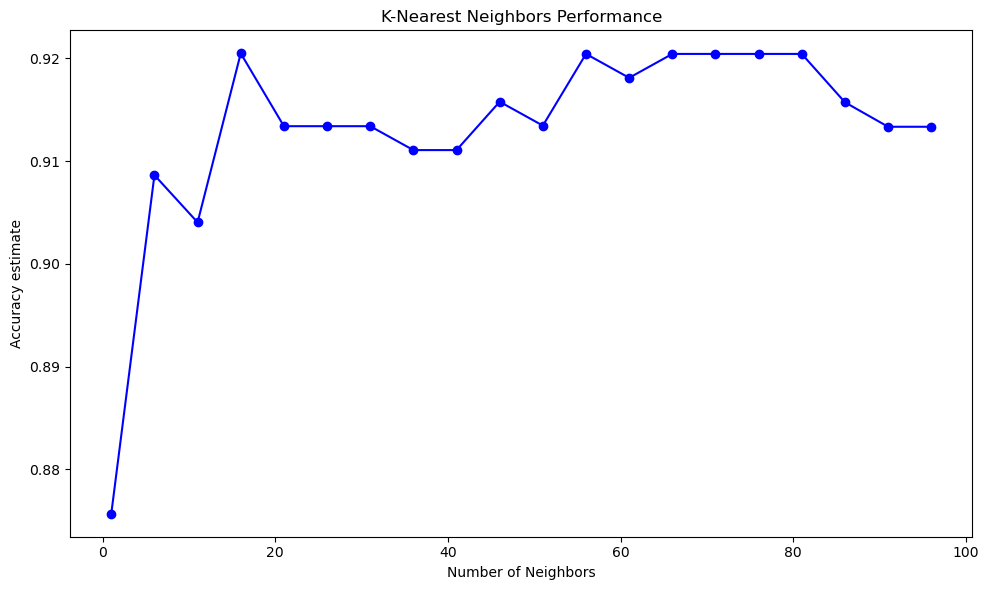

In [413]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

In [414]:
# obtain our best value of k

cancer_tune_grid.best_params_

{'n_neighbors': 16}